# How do TV commercials affect people’s attitude towards the brands in social media?

## Brand: Expedia, Priceline, TripAdvisor, Trivago
## Three data source: Alphonso, Twitter, YouTube

In [1]:
import pandas as pd
import csv

## Alphonso --> commercial airing data
### Download from website directly

In [2]:
priceline_commercial = pd.read_excel("priceline_alphonso.xlsx")
tripadvisor_commercial = pd.read_excel("TripAdvisor_alphonso.xlsx")

### Merge all the commercial datatogether

In [3]:
tripadvisor_commercial['brand_id'] = 'tripadvisor'

In [4]:
priceline_commercial['brand_id'] = 'priceline'

In [5]:
commercials = pd.concat([tripadvisor_commercial, priceline_commercial],axis=0, ignore_index=True, sort=False)

In [6]:
commercials['Date'] = commercials['Date'].map(lambda x: "{}-{}-{}".format(x[-4:],x[0:2],x[3:5]))

In [7]:
commercials.rename(columns={'Date':'date'}, 
                 inplace=True)

In [8]:
commercials = commercials.drop(['Category','Network Type', 'Dayparts', 'Tag', 'Broadcast Year', 'Broadcast Month'], axis=1)

In [9]:
commercials['date'] = pd.to_datetime(commercials.date)

In [10]:
min(commercials[commercials.brand_id == 'tripadvisor']['date'])

Timestamp('2018-04-01 00:00:00')

In [11]:
max(commercials[commercials.brand_id == 'tripadvisor']['date'])

Timestamp('2018-07-30 00:00:00')

In [12]:
min(commercials[commercials.brand_id == 'priceline']['date'])

Timestamp('2018-04-01 00:00:00')

In [13]:
max(commercials[commercials.brand_id == 'priceline']['date'])

Timestamp('2018-09-10 00:00:00')

In [14]:
commercials

,Network,Show,date,Duration,Broadcast Week,Day Of Week,Hour Of Day,brand_id
0,USA Network,The Shawshank Redemption,2018-04-08,15,14,7,20,tripadvisor
1,USA Network,The Shawshank Redemption,2018-04-08,15,14,7,21,tripadvisor
2,Travel Channel,Bizarre Foods With Andrew Zimmern,2018-04-09,15,15,1,12,tripadvisor
3,Travel Channel,Bizarre Foods With Andrew Zimmern,2018-04-09,15,15,1,16,tripadvisor
4,Travel Channel,Bizarre Foods With Andrew Zimmern,2018-04-09,15,15,1,16,tripadvisor
5,AMC,Braveheart,2018-04-09,15,15,1,15,tripadvisor
6,HGTV,Love It or List It,2018-04-09,15,15,1,13,tripadvisor
7,Discovery Channel,Fast N' Loud,2018-04-09,15,15,1,16,tripadvisor
8,Discovery Channel,Shifting Gears With Aaron Kaufman,2018-04-09,15,15,1,11,tripadvisor
9,FYI,Duck Dynasty,2018-04-08,15,14,7,23,tripadvisor


## Twitter data
### -  xpath to get tweet ids for each brand
### -  tweepy package to get publish time, favorite number, retweet times and content of the tweet according to certain id
### -  wirte the web scripting result in text files



In [15]:
from tweepy import OAuthHandler
import tweepy
import config
import time

### get_id_list function is aim to get a list of tweets id which contains the brand name from text file from xpath.

In [16]:
def get_id_list(tweetfile):
    with open(tweetfile, 'r') as f:
        tweetids = f.read()
    twee_id = []
    for row in tweetids.split("\n"):
        twee_id.append(row.split("/")[-1])
    return twee_id

### get_tweet_data function is aim to get tweet information according to the tweet id.

In [17]:
def get_tweet_data(stats_obj):
    tweetid = stats_obj.id
    text = stats_obj.text
    favs = stats_obj.favorite_count
    rtcount= stats_obj.retweet_count
    create_time = stats_obj.created_at
    return "{}@@*{}@@*{}@@*{}@@*{}".format(tweetid, create_time, favs, rtcount, text)

### Since I takes too long to run this cell, I just show it as a comment cell.
### It shows the procedure to output the tweets data using tweepy and my keys.

In [18]:
# auth = OAuthHandler(config.api_key, config.api_secret)
# auth.set_access_token(config.access_token, config.token_secret)
# api = tweepy.API(auth)
# tweets = get_id_list('tripadvisorid.txt')
# for each_id in tweets:
#     try:
#         tweet = api.get_status(each_id)
#     except tweepy.error.TweepError:
#         continue
#     else:
#         try:
#             with open("tripadvisor_newcontent.txt", 'a') as f:
#                 print(get_tweet_data(tweet), file=f)
#                 print("@@%", file=f)
#             time.sleep(1)
#         except UnicodeEncodeError:
#             continue

## output files of the tweets parsing result
### To split the data, I use combinations of special marks to delimite tweets and elements of a tweet.

In [19]:
def tweets_to_pandas(file_name):
    with open(file_name) as file:
        exdata = file.read()
    lines = exdata.split("@@%")
    tweetid = []
    text = []
    favs = []
    rtcount = []
    create_time = []
    for line in lines[0:-1]:
        element = line.strip("\n").split("@@*")
        tweetid.append(element[0])
        create_time.append(element[1])
        favs.append(element[2])
        rtcount.append(element[3])
        text.append(element[4])
    return pd.DataFrame({'tweetid':tweetid, 'create_time':create_time, 'favs':favs, 'rtcount':rtcount, 'text':text})

In [20]:
priceline_twitterdata = tweets_to_pandas("priceline_twittercontent.txt")
tripadvisor_twitterdata = tweets_to_pandas("tripadvisor_twittercontent.txt")

### Data Cleaning

In [21]:
priceline_twitterdata['create_time'] = priceline_twitterdata.create_time.map(lambda x: x[0:-9])
tripadvisor_twitterdata['create_time'] = tripadvisor_twitterdata.create_time.map(lambda x: x[0:-9])

In [22]:
priceline_twitterdata['favs'] = pd.to_numeric(priceline_twitterdata['favs'])
priceline_twitterdata['rtcount'] = pd.to_numeric(priceline_twitterdata['rtcount'])
tripadvisor_twitterdata['favs'] = pd.to_numeric(tripadvisor_twitterdata['favs'])
tripadvisor_twitterdata['rtcount'] = pd.to_numeric(tripadvisor_twitterdata['rtcount'])

## sentiment analysis

In [23]:
from textblob import TextBlob

In [24]:
priceline_twitterdata['twitter_polarity'] = priceline_twitterdata.text.map(lambda x : TextBlob(x).sentiment.polarity)
priceline_twitterdata['twitter_subjectivity'] = priceline_twitterdata.text.map(lambda x : TextBlob(x).sentiment.subjectivity)

In [25]:
tripadvisor_twitterdata['twitter_polarity'] = tripadvisor_twitterdata.text.map(lambda x : TextBlob(x).sentiment.polarity)
tripadvisor_twitterdata['twitter_subjectivity'] = tripadvisor_twitterdata.text.map(lambda x : TextBlob(x).sentiment.subjectivity)

In [26]:
priceline_twitternum = priceline_twitterdata.groupby("create_time").mean()
tripadvisor_twitternum = tripadvisor_twitterdata.groupby("create_time").mean()

In [27]:
priceline_twitternum.reset_index(inplace=True)
tripadvisor_twitternum.reset_index(inplace=True)

In [28]:
priceline_twitternum['brand_id'] = 'priceline'
tripadvisor_twitternum['brand_id'] = 'tripadvisor'

In [29]:
clean_twi_priceline = priceline_twitternum[priceline_twitternum.create_time <= '2018-09-10']
clean_twi_tripadvisor = tripadvisor_twitternum[tripadvisor_twitternum.create_time <= '2018-07-30']

In [30]:
twitterdata = pd.concat([clean_twi_priceline, clean_twi_tripadvisor],\
                       axis=0, ignore_index=False, sort=False)

In [31]:
twitterdata.rename(columns={'create_time':'date'}, 
                 inplace=True)

In [32]:
twitterdata['date'] = pd.to_datetime(twitterdata.date)

In [33]:
twitterdata

,date,favs,rtcount,twitter_polarity,twitter_subjectivity,brand_id
0,2018-04-01,1.000000,0.333333,0.227778,0.355556,priceline
1,2018-04-02,70.071429,75.642857,-0.062389,0.276025,priceline
2,2018-04-07,22.500000,6.000000,-0.200000,0.250000,priceline
3,2018-04-14,12.000000,4.000000,0.000000,0.000000,priceline
4,2018-04-18,10.000000,6.000000,0.000000,0.000000,priceline
5,2018-04-21,66.200000,21.800000,0.242857,0.354286,priceline
6,2018-04-22,40.000000,21.000000,0.000000,0.000000,priceline
7,2018-04-25,26.000000,1.000000,0.500000,0.500000,priceline
8,2018-04-26,17.000000,1.000000,-0.012175,0.405844,priceline
9,2018-04-30,8.000000,5.000000,-0.131818,0.577273,priceline


## YouTube data
### I get the data through [Google API Explorer](https://developers.google.com/apis-explorer/#p/youtube/v3/youtube.commentThreads.list?part=snippet&videoId=tO_jgARxWOg&_h=4&) and download the result as txt files in json form.

In [34]:
with open('priceline.txt') as f:
    json = f.read()
json

'{\n "kind": "youtube#commentThreadListResponse",\n "etag": "\\"XI7nbFXulYBIpL0ayR_gDh3eu1k/FCkEI8nGG9n2AVEopc-0Q-GqiUk\\"",\n "nextPageToken": "QURTSl9pM0FEbUpmbk5jeGNkYkVxNDhDWWllUmNMb3NPbWZYY2JCd19VUTRMVlVTR09fcFRWbVRjUU9sRGhBcmlFNTBBSGItSGQzeUlWSnNGekdyenBxaW1tZlZNQkdzSkQySzB4dHo3U001anppLTNNQUM5Q1QyNXZvcWhneVl5ZTA=",\n "pageInfo": {\n  "totalResults": 78,\n  "resultsPerPage": 100\n },\n "items": [\n  {\n\n\n   "kind": "youtube#commentThread",\n   "etag": "\\"XI7nbFXulYBIpL0ayR_gDh3eu1k/hPkoJFGkrKaAPWcfKRaY0cadAws\\"",\n   "id": "Ugwn27toBCVkwfy95PR4AaABAg",\n   "snippet": {\n    "channelId": "UCki--exq5QmxMgg001Ix9Aw",\n    "videoId": "k445QuZfp5w",\n    "topLevelComment": {\n     "kind": "youtube#comment",\n     "etag": "\\"XI7nbFXulYBIpL0ayR_gDh3eu1k/9o2ZqrUundLeg7lW7CIvnPA9X8E\\"",\n     "id": "Ugwn27toBCVkwfy95PR4AaABAg",\n     "snippet": {\n      "authorDisplayName": "FlightspottersBD",\n      "authorProfileImageUrl": "https://yt3.ggpht.com/-kaQB2gLBSEU/AAAAAAAAAAI/AAAAAAAAAA

### I use json pacakage to parse the json file to extract the data.

In [35]:
import json

In [36]:
def youtube_to_pandas(file_name):
    with open(file_name) as infile:
        data = json.loads(infile.read())
    allcomments = data['items']
    id = []
    channelid = []
    videoid = []
    content = []
    time = []
    for comment in allcomments:
        id.append(comment['id'])
        channelid.append(comment['snippet']['channelId'])
        videoid.append(comment['snippet']['videoId'])
        content.append(comment['snippet']['topLevelComment']['snippet']['textOriginal'])
        time.append(comment['snippet']['topLevelComment']['snippet']['publishedAt'])
    data = {'review_id':id, 'channel_id':channelid, 'videoid':videoid, 'review_content':content, 'publish_time':time}
    return pd.DataFrame(data)

In [37]:
priceline_youtube = youtube_to_pandas("priceline.txt")

In [38]:
tripadvisor_youtube = youtube_to_pandas("TripAdvisor.txt")

## sentiment analysis

In [39]:
priceline_youtube['youtube_polarity'] = priceline_youtube.review_content.map(lambda x : TextBlob(x).sentiment.polarity)
priceline_youtube['youtube_subjectivity'] = priceline_youtube.review_content.map(lambda x : TextBlob(x).sentiment.subjectivity)

In [40]:
priceline_youtube.publish_time = priceline_youtube.publish_time.map(lambda x: x[0:10])
priceline_youtubenum = priceline_youtube.groupby('publish_time').mean()
priceline_youtubenum['brand_id'] = "priceline"
priceline_youtubenum.reset_index(inplace=True)

In [41]:
tripadvisor_youtube['youtube_polarity'] = tripadvisor_youtube.review_content.map(lambda x : TextBlob(x).sentiment.polarity)
tripadvisor_youtube['youtube_subjectivity'] = tripadvisor_youtube.review_content.map(lambda x : TextBlob(x).sentiment.subjectivity)

In [42]:
tripadvisor_youtube.publish_time = tripadvisor_youtube.publish_time.map(lambda x: x[0:10])
tripadvisor_youtubenum = tripadvisor_youtube.groupby('publish_time').mean()
tripadvisor_youtubenum['brand_id'] = "tripadvisor"
tripadvisor_youtubenum.reset_index(inplace=True)

In [43]:
clean_you_priceline = priceline_youtubenum[priceline_youtubenum.publish_time <= '2018-09-10']
clean_you_tripadvisor = tripadvisor_youtubenum[tripadvisor_youtubenum.publish_time <= '2018-07-30']

In [44]:
youtubedata = pd.concat([clean_you_priceline, clean_you_tripadvisor],\
                        axis=0, ignore_index=True, sort=False)

In [45]:
youtubedata.rename(columns={'publish_time':'date'}, 
                 inplace=True)

In [46]:
youtubedata['date'] = pd.to_datetime(youtubedata.date)

In [47]:
youtubedata

,date,youtube_polarity,youtube_subjectivity,brand_id
0,2018-02-03,0.083333,0.416667,priceline
1,2018-02-05,0.000000,0.000000,priceline
2,2018-02-14,0.045455,0.333333,priceline
3,2018-02-22,0.500000,1.000000,priceline
4,2018-02-25,0.000000,0.000000,priceline
5,2018-03-01,-0.156250,0.375000,priceline
6,2018-03-02,0.523611,0.472222,priceline
7,2018-03-04,0.000000,0.000000,priceline
8,2018-03-05,-0.520000,0.780000,priceline
9,2018-03-06,0.000000,0.000000,priceline


## Merge all the data together: commercial data, twitter data and youtube data

In [48]:
merging = pd.merge(commercials, twitterdata, how='inner', on=['date', 'brand_id'])

In [49]:
result = pd.merge(merging, youtubedata, how='left', on=['date', 'brand_id'])

In [50]:
result

,Network,Show,date,Duration,Broadcast Week,Day Of Week,Hour Of Day,brand_id,favs,rtcount,twitter_polarity,twitter_subjectivity,youtube_polarity,youtube_subjectivity
0,USA Network,The Shawshank Redemption,2018-04-08,15,14,7,20,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
1,USA Network,The Shawshank Redemption,2018-04-08,15,14,7,21,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
2,FYI,Duck Dynasty,2018-04-08,15,14,7,23,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
3,FYI,Duck Dynasty,2018-04-08,15,14,7,22,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
4,MSNBC,Dateline Extra,2018-04-08,15,14,7,23,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
5,MSNBC,Dateline Extra,2018-04-08,15,14,7,23,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
6,MSNBC,Kasie DC,2018-04-08,15,14,7,20,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
7,MSNBC,Kasie DC,2018-04-08,15,14,7,20,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
8,TBS,The Big Bang Theory,2018-04-08,15,14,7,21,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN
9,TBS,The Big Bang Theory,2018-04-08,15,14,7,21,tripadvisor,18.545455,7.090909,0.187879,0.397727,NaN,NaN


In [ ]:
result.to_csv("outfile.csv")

# Data Analyzing Part STARTS...

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
commercialdata = pd.DataFrame()
commercialdata['counts'] = commercials[commercials.brand_id == 'tripadvisor'].groupby('date').count()['Show']
commercialdata.reset_index(inplace=True)

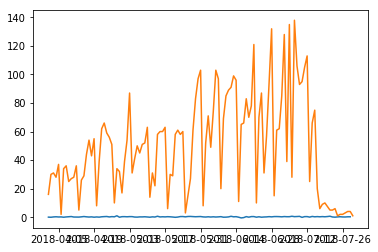

In [53]:
plt.plot(twitterdata[twitterdata.brand_id == 'tripadvisor']['date'], twitterdata[twitterdata.brand_id == 'tripadvisor'].twitter_polarity)
plt.plot(commercialdata.date, commercialdata.counts)

## The scale is different, so we apply Z-score standardization to each data

In [62]:
import numpy as np

def z_score(x, axis):
    x = np.array(x).astype(float)
    xr = np.rollaxis(x, axis=axis)
    xr -= np.mean(x, axis=axis)
    xr /= np.std(x, axis=axis)
    # print(x)
    return x

In [55]:
z_commercialdata = z_score(commercialdata.counts,0)

In [56]:
z_twitter_polarity = z_score(twitterdata[twitterdata.brand_id == 'tripadvisor'].twitter_polarity,0)

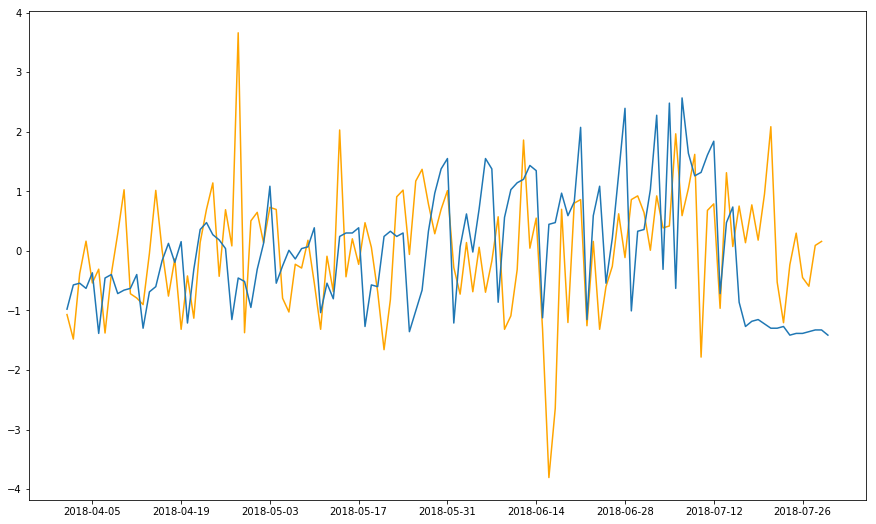

In [57]:
figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)
plt.plot(twitterdata[twitterdata.brand_id == 'tripadvisor']['date'], z_twitter_polarity, color='orange')
plt.plot(commercialdata.date, z_commercialdata)

In [82]:
import scipy.stats as stats

In [83]:
r, p=stats.pearsonr(commercialdata.counts, twitterdata[twitterdata.brand_id == 'tripadvisor'].twitter_polarity) 

In [84]:
r

0.11550373602191435

In [85]:
p

0.20902691596997358